<a href="https://colab.research.google.com/github/vkurpmax/Machine-Learning/blob/main/Asia%20University%20Course/Final_Project_Stock_06_Decision_Tree_2330(with%20faris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving 2330.TW.csv to 2330.TW (10).csv


In [3]:
# Store the data into a data frame
df = pd.read_csv('2330.TW.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-04,645.0,656.0,644.0,656.0,641.826233,79434666
1,2022-01-05,669.0,669.0,646.0,650.0,635.955933,69593809
2,2022-01-06,638.0,646.0,636.0,644.0,630.085571,53210211
3,2022-01-07,643.0,646.0,632.0,634.0,620.301575,38249908
4,2022-01-10,628.0,645.0,627.0,643.0,629.107178,38289770
5,2022-01-11,646.0,651.0,639.0,651.0,636.934265,33196585


In [4]:
#feature selection
df = df.drop(['High', 'Low'], axis=1)
df.head(6)

,Date,Open,Close,Adj Close,Volume
0,2022-01-04,645.0,656.0,641.826233,79434666
1,2022-01-05,669.0,650.0,635.955933,69593809
2,2022-01-06,638.0,644.0,630.085571,53210211
3,2022-01-07,643.0,634.0,620.301575,38249908
4,2022-01-10,628.0,643.0,629.107178,38289770
5,2022-01-11,646.0,651.0,636.934265,33196585


In [5]:
df.rename(columns = {'Open':'Open Price', 'Close':'Close Price', 'Adj Close':'Adj Close Price'}, inplace = True)
df.head(6)

,Date,Open Price,Close Price,Adj Close Price,Volume
0,2022-01-04,645.0,656.0,641.826233,79434666
1,2022-01-05,669.0,650.0,635.955933,69593809
2,2022-01-06,638.0,644.0,630.085571,53210211
3,2022-01-07,643.0,634.0,620.301575,38249908
4,2022-01-10,628.0,643.0,629.107178,38289770
5,2022-01-11,646.0,651.0,636.934265,33196585


In [6]:
# Get the number of trading days
df.shape

(247, 5)

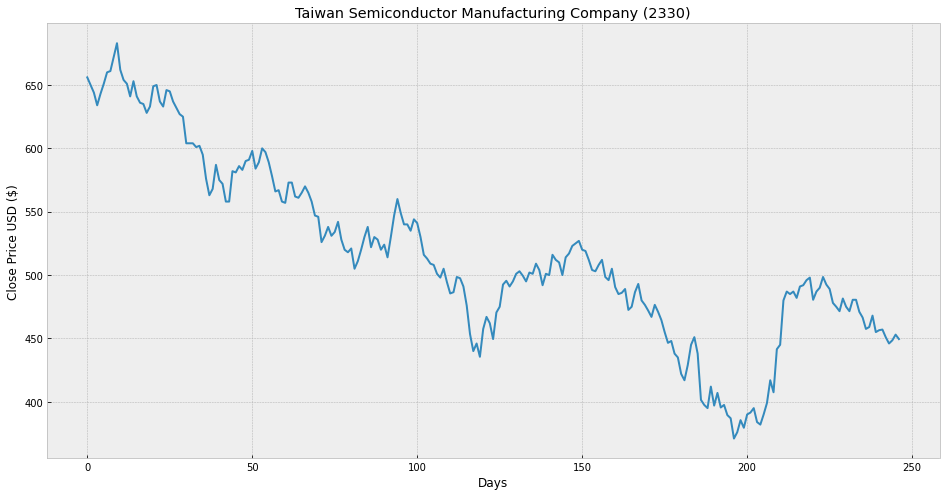

In [7]:
# Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Taiwan Semiconductor Manufacturing Company (2330)')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close Price'])
plt.show()

In [8]:
sorting = df.sort_values(by ='Volume', ascending = 247)
print(sorting)

           Date  Open Price  Close Price  Adj Close Price     Volume
240  2022-12-26       454.0        456.5       456.500000    8793306
155  2022-08-25       505.0        508.0       502.198883    9357138
241  2022-12-27       458.0        457.0       457.000000   10264001
152  2022-08-22       511.0        512.0       506.153198   11494000
156  2022-08-26       513.0        512.0       506.153198   12914846
..          ...         ...          ...              ...        ...
36   2022-03-07       580.0        576.0       563.554749   86496560
31   2022-02-25       600.0        604.0       590.949829   89012516
8    2022-01-14       673.0        672.0       657.480652   95200777
186  2022-10-11       408.0        401.5       399.202148   95793819
211  2022-11-15       465.0        480.0       477.252869  113379796

[247 rows x 5 columns]


In [9]:
# Get the close price
data = df[['Close Price']]
data.head(4)

,Close Price
0,656.0
1,650.0
2,644.0
3,634.0


In [10]:
# Create a variable to predict 'x' days out into the future
future_days = 5

# Create a new column (target) shifted 'x' units/days up
data['Prediction'] = data[['Close Price']].shift(-future_days)
data.tail(4)

<ipython-input-10-70d3c75f6662>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction'] = data[['Close Price']].shift(-future_days)


,Close Price,Prediction
243,446.0,NaN
244,448.5,NaN
245,453.0,NaN
246,449.5,NaN


In [11]:
# Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(data.drop(['Prediction'], 1))[:-future_days]
print(X)

[[656. ]
 [650. ]
 [644. ]
 [634. ]
 [643. ]
 [651. ]
 [660. ]
 [661. ]
 [672. ]
 [683. ]
 [662. ]
 [654. ]
 [651. ]
 [641. ]
 [653. ]
 [641. ]
 [636. ]
 [635. ]
 [628. ]
 [633. ]
 [649. ]
 [650. ]
 [637. ]
 [633. ]
 [646. ]
 [645. ]
 [637. ]
 [632. ]
 [627. ]
 [625. ]
 [604. ]
 [604. ]
 [604. ]
 [601. ]
 [602. ]
 [595. ]
 [576. ]
 [563. ]
 [568. ]
 [587. ]
 [575. ]
 [572. ]
 [558. ]
 [558. ]
 [582. ]
 [581. ]
 [586. ]
 [583. ]
 [590. ]
 [591. ]
 [598. ]
 [584. ]
 [589. ]
 [600. ]
 [597. ]
 [589. ]
 [578. ]
 [566. ]
 [567. ]
 [558. ]
 [557. ]
 [573. ]
 [573. ]
 [562. ]
 [561. ]
 [565. ]
 [570. ]
 [565. ]
 [558. ]
 [547. ]
 [546. ]
 [526. ]
 [531. ]
 [538. ]
 [531. ]
 [534. ]
 [542. ]
 [528. ]
 [520. ]
 [518. ]
 [521. ]
 [505. ]
 [511. ]
 [520. ]
 [530. ]
 [538. ]
 [522. ]
 [530. ]
 [528. ]
 [520. ]
 [524. ]
 [514. ]
 [530. ]
 [547. ]
 [560. ]
 [549. ]
 [540. ]
 [540. ]
 [535. ]
 [544. ]
 [541. ]
 [530. ]
 [516. ]
 [513. ]
 [509. ]
 [508. ]
 [501. ]
 [498. ]
 [505. ]
 [494.5]
 [485.5]
 

<ipython-input-11-5baf8fb07225>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop(['Prediction'], 1))[:-future_days]


In [21]:
data.head(10)

,Close Price,Prediction
0,656.0,651.0
1,650.0,660.0
2,644.0,661.0
3,634.0,672.0
4,643.0,683.0
5,651.0,662.0
6,660.0,654.0
7,661.0,651.0
8,672.0,641.0
9,683.0,653.0


In [13]:
# Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(data['Prediction'])[:-future_days]
print(y)



[651.  660.  661.  672.  683.  662.  654.  651.  641.  653.  641.  636.
 635.  628.  633.  649.  650.  637.  633.  646.  645.  637.  632.  627.
 625.  604.  604.  604.  601.  602.  595.  576.  563.  568.  587.  575.
 572.  558.  558.  582.  581.  586.  583.  590.  591.  598.  584.  589.
 600.  597.  589.  578.  566.  567.  558.  557.  573.  573.  562.  561.
 565.  570.  565.  558.  547.  546.  526.  531.  538.  531.  534.  542.
 528.  520.  518.  521.  505.  511.  520.  530.  538.  522.  530.  528.
 520.  524.  514.  530.  547.  560.  549.  540.  540.  535.  544.  541.
 530.  516.  513.  509.  508.  501.  498.  505.  494.5 485.5 486.5 498.5
 497.5 491.  476.  453.5 440.  446.  435.5 457.5 467.  462.  449.5 470.5
 475.  492.5 495.5 491.  495.  501.  503.  499.5 495.  502.  501.  509.
 504.  492.  501.  500.  516.  512.  510.  500.  514.  517.  523.  525.
 527.  520.  519.  512.  504.  503.  508.  512.  498.5 496.  505.  490.5
 485.  486.  489.  472.5 475.  486.5 493.  480.  476.5 472.  

In [14]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [15]:
print(y_test)


[568.  534.  496.  371.  391.5 493.  384.  478.  662.  490.  486.5 435.5
 509.  540.  530.  498.5 485.5 528.  438.  487.  528.  570.  475.  637.
 576.  466.5 487.  525.  471.5 565.  523.  516.  505.  557.  600.  549.
 590.  540.  495.  661.  482.  496.  598.  520.  562.  561.  486.  591.
 440.  512.  498.5 395.  558.  480.5 651.  489.  487.  653.  459.  522.
 449.5]


In [16]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Create the linear regression model
#lr = LinearRegression().fit(x_train, y_train)

In [17]:
# Get the last 'x' rows of the future data set
x_future = data.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-17-df528b9b0a32>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = data.drop(['Prediction'], 1)[:-future_days]


array([[459. ],
       [468. ],
       [455. ],
       [456.5],
       [457. ]])

In [18]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the model linear regression prediction
#lr_prediction = lr.predict(x_future)
#print(lr_prediction)

[451.   446.   435.25 453.   449.5 ]



<ipython-input-19-1a58b0873291>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


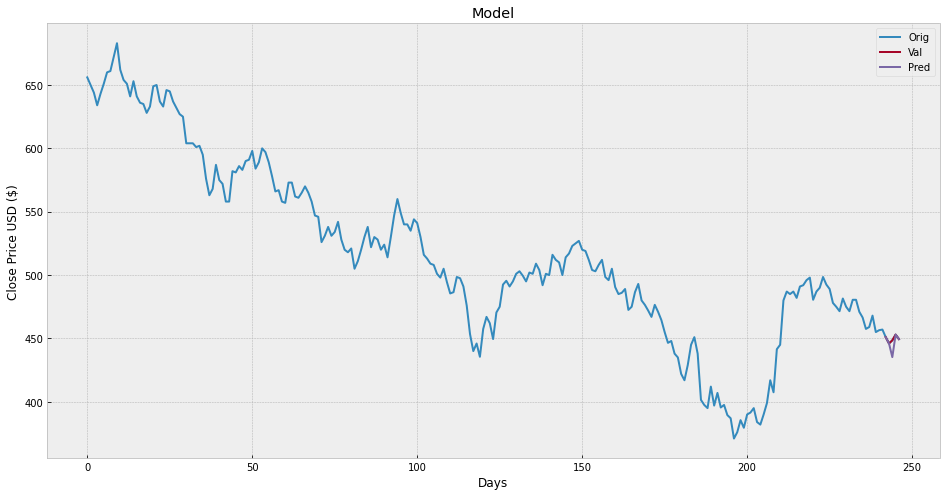

In [19]:
# Visualize the data
predictions = tree_prediction

valid = data[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [22]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix  


acc_decision_tree_train = round(tree.score(x_train, y_train) * 100, 2)
print("Train Accuracy", acc_decision_tree_train, "%")



acc_decision_tree_test = round(tree.score(x_test, y_test) * 100, 2)
print('Test accuracy:', acc_decision_tree_test, "%")

Train Accuracy 98.72 %
Test accuracy: 78.55 %


In [23]:
volume = df['Volume']
volume

0      79434666
1      69593809
2      53210211
3      38249908
4      38289770
         ...   
242    32578949
243    23020759
244    21683478
245    14885824
246    19446452
Name: Volume, Length: 247, dtype: int64

In [24]:
data = data.join(volume)
data

,Close Price,Prediction,Volume
0,656.0,651.0,79434666
1,650.0,660.0,69593809
2,644.0,661.0,53210211
3,634.0,672.0,38249908
4,643.0,683.0,38289770
...,...,...,...
242,451.0,NaN,32578949
243,446.0,NaN,23020759
244,448.5,NaN,21683478
245,453.0,NaN,14885824


In [27]:
# Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(data.drop(['Prediction'],1))[:-future_days]
print(X)

[[6.56000000e+02 7.94346660e+07]
 [6.50000000e+02 6.95938090e+07]
 [6.44000000e+02 5.32102110e+07]
 [6.34000000e+02 3.82499080e+07]
 [6.43000000e+02 3.82897700e+07]
 [6.51000000e+02 3.31965850e+07]
 [6.60000000e+02 3.88600630e+07]
 [6.61000000e+02 3.81374110e+07]
 [6.72000000e+02 9.52007770e+07]
 [6.83000000e+02 5.96142360e+07]
 [6.62000000e+02 4.35933300e+07]
 [6.54000000e+02 4.03813330e+07]
 [6.51000000e+02 4.64745840e+07]
 [6.41000000e+02 4.95776840e+07]
 [6.53000000e+02 4.71345020e+07]
 [6.41000000e+02 5.23187360e+07]
 [6.36000000e+02 2.99571890e+07]
 [6.35000000e+02 5.68364690e+07]
 [6.28000000e+02 3.97182170e+07]
 [6.33000000e+02 3.00487910e+07]
 [6.49000000e+02 3.45871330e+07]
 [6.50000000e+02 2.67232780e+07]
 [6.37000000e+02 2.78263820e+07]
 [6.33000000e+02 2.19704600e+07]
 [6.46000000e+02 2.51917410e+07]
 [6.45000000e+02 1.81350800e+07]
 [6.37000000e+02 2.08041910e+07]
 [6.32000000e+02 2.37975020e+07]
 [6.27000000e+02 3.40865930e+07]
 [6.25000000e+02 3.19530540e+07]
 [6.040000

<ipython-input-27-ba47b12d772b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop(['Prediction'],1))[:-future_days]


In [29]:
# Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(data['Prediction'])[:-future_days]
print(y)



[651.  660.  661.  672.  683.  662.  654.  651.  641.  653.  641.  636.
 635.  628.  633.  649.  650.  637.  633.  646.  645.  637.  632.  627.
 625.  604.  604.  604.  601.  602.  595.  576.  563.  568.  587.  575.
 572.  558.  558.  582.  581.  586.  583.  590.  591.  598.  584.  589.
 600.  597.  589.  578.  566.  567.  558.  557.  573.  573.  562.  561.
 565.  570.  565.  558.  547.  546.  526.  531.  538.  531.  534.  542.
 528.  520.  518.  521.  505.  511.  520.  530.  538.  522.  530.  528.
 520.  524.  514.  530.  547.  560.  549.  540.  540.  535.  544.  541.
 530.  516.  513.  509.  508.  501.  498.  505.  494.5 485.5 486.5 498.5
 497.5 491.  476.  453.5 440.  446.  435.5 457.5 467.  462.  449.5 470.5
 475.  492.5 495.5 491.  495.  501.  503.  499.5 495.  502.  501.  509.
 504.  492.  501.  500.  516.  512.  510.  500.  514.  517.  523.  525.
 527.  520.  519.  512.  504.  503.  508.  512.  498.5 496.  505.  490.5
 485.  486.  489.  472.5 475.  486.5 493.  480.  476.5 472.  

In [30]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [31]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Create the linear regression model
#lr = LinearRegression().fit(x_train, y_train)

In [33]:
# Get the last 'x' rows of the future data set
x_future = data.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-33-1d14b8589666>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = data.drop(['Prediction'],1)[:-future_days]


array([[4.5900000e+02, 3.6182644e+07],
       [4.6800000e+02, 1.4047382e+07],
       [4.5500000e+02, 2.4927413e+07],
       [4.5650000e+02, 8.7933060e+06],
       [4.5700000e+02, 1.0264001e+07]])

In [34]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the model linear regression prediction
#lr_prediction = lr.predict(x_future)
#print(lr_prediction)

[451.  446.  448.5 453.  453. ]



<ipython-input-35-1a58b0873291>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


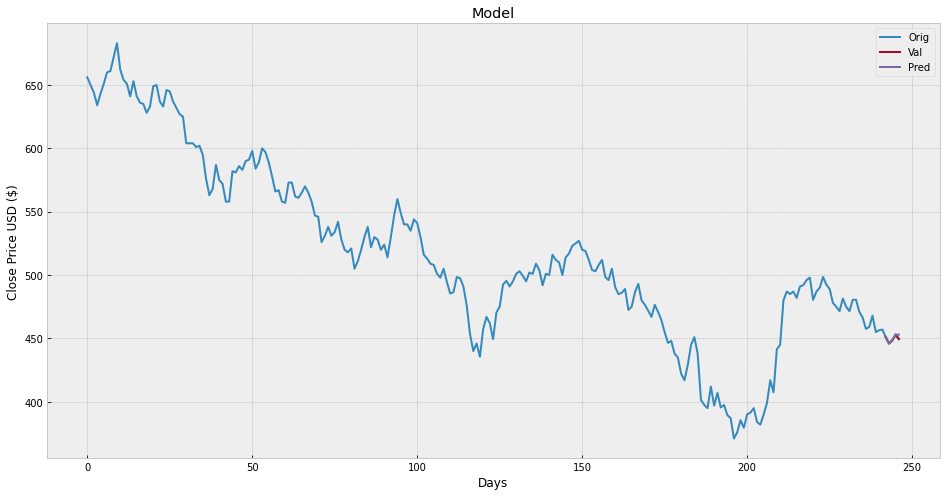

In [35]:
# Visualize the data
predictions = tree_prediction

valid = data[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(data['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [36]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix  


acc_decision_tree_train = round(tree.score(x_train, y_train) * 100, 2)
print("Train Accuracy", acc_decision_tree_train, "%")



acc_decision_tree_test = round(tree.score(x_test, y_test) * 100, 2)
print('Test accuracy:', acc_decision_tree_test, "%")

Train Accuracy 100.0 %
Test accuracy: 89.57 %
